In [1]:
import time

from vivarium.environments.braitenberg.selective_sensing import SelectiveSensorsEnv, init_state
from vivarium.environments.braitenberg.render import render, render_history

## Init and launch a simulation

We define an environment with 4 types of entities, preys and predators as agents, and resources and poison as objects. The data of each entity type are defined in a dictionary specifying their type, their number and their color, as well as their behaviors if they are agents. Then all this data is aggregated in an entities data dictionary passed to a function to init the state of the simulation.

In [2]:
entities_subtypes = ['PREYS', 'PREDS', 'RESOURCES', 'POISON']

preys_data = {
    'type': 'AGENT',
    'num': 5,
    'color': 'blue',
    'selective_behaviors': {
        'love': {'beh': 'LOVE', 'sensed': ['PREYS', 'RESOURCES']},
        'fear': {'beh': 'FEAR', 'sensed': ['PREDS', 'POISON']}
    }}

preds_data = {
    'type': 'AGENT',
    'num': 5,
    'color': 'red',
    'selective_behaviors': {
        'aggr': {'beh': 'AGGRESSION','sensed': ['PREYS']},
        'fear': {'beh': 'FEAR','sensed': ['POISON']
        }
    }}

resources_data = {
    'type': 'OBJECT',
    'num': 5,
    'color': 'green'}

poison_data = {
    'type': 'OBJECT',
    'num': 5,
    'color': 'purple'}

entities_data = {
    'EntitySubTypes': entities_subtypes,
    'Entities': {
        'PREYS': preys_data,
        'PREDS': preds_data,
        'RESOURCES': resources_data,
        'POISON': poison_data
    }}

In [3]:
state = init_state(entities_data)
env = SelectiveSensorsEnv(state, occlusion=True)

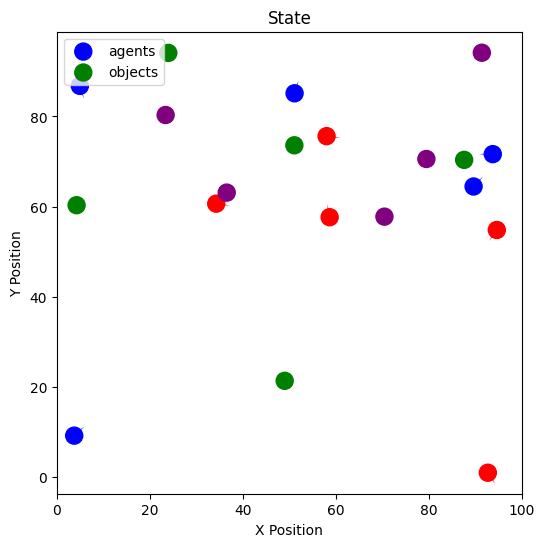

In [4]:
render(state)

In [5]:
n_steps = 5_000
hist = []

for i in range(n_steps):
    state = env.step(state)
    hist.append(state)

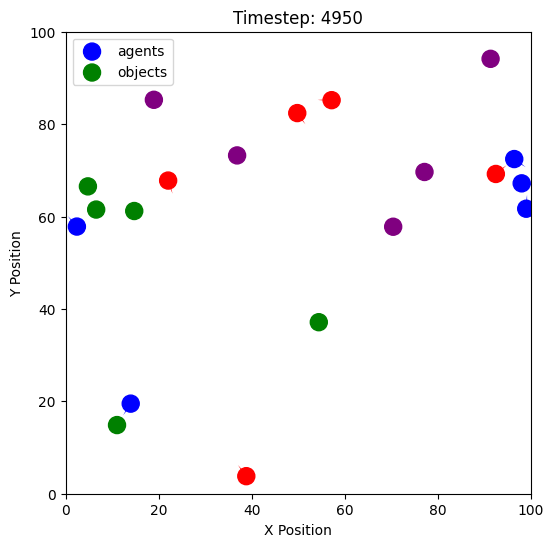

In [6]:
render_history(hist, skip_frames=50)

## Add new types of entities

Add a new entity type, for example we'll add a 'dumb' agents that is aggressive towards every entity he encounters (even other dumbs).

In [7]:
# Define data for new entity
new_subtypes = ['DUMB']

dumb_data = {
    'type': 'AGENT',
    'num': 5,
    'color': 'gray',
    'selective_behaviors': {
        'aggr': {'beh': 'AGGRESSION','sensed': ['PREYS', 'PREDS', 'RESOURCES', 'POISON', 'DUMB']},
        'fear': {'beh': 'FEAR','sensed': []
        }
    }}

# Update the entities data
entities_data['EntitySubTypes'] += new_subtypes
entities_data['Entities']['DUMB'] = dumb_data

In [8]:
state = init_state(entities_data)
env = SelectiveSensorsEnv(state, occlusion=True)

In [9]:
n_steps = 5_000
hist = []

for i in range(n_steps):
    state = env.step(state)
    hist.append(state)

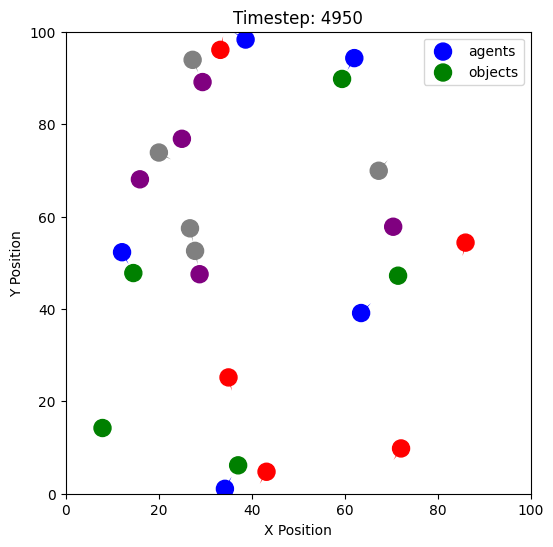

In [10]:
render_history(hist, skip_frames=50)

## Scale the size of the simulation

Launch a simulation with a bigger box size, as well as more agents and objects. Increase the box_size and the max distance of proximeters.

In [11]:
box_size = 1000
prox_dist_max = 100

for ent_type, data in entities_data['Entities'].items():
    data['num'] = 25

In [12]:
# set the neighbor radius to the box_size to ensure the agents all have neighbors arrays of same shape
state = init_state(entities_data=entities_data, box_size=box_size, neighbor_radius=box_size, prox_dist_max=prox_dist_max)
env = SelectiveSensorsEnv(state, occlusion=True)

In [13]:
n_steps = 20_000

hist = []
start = time.perf_counter()
for i in range(n_steps):
    if i % 5000 == 0:
        print(f"step {i}")
    state = env.step(state) 
    hist.append(state)
end = time.perf_counter()

time = end - start
print(f"Simulation ran in {time} for {n_steps} timesteps")

step 0
step 5000
step 10000
step 15000
Simulation ran in 114.98858090001158 for 20000 timesteps


Pretty slow if you don't use a GPU

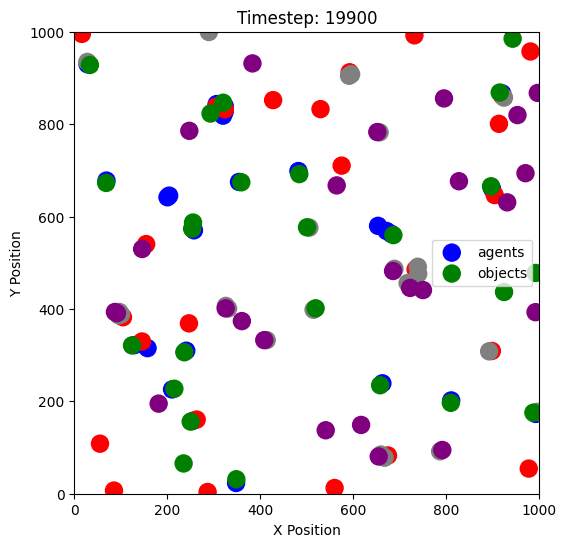

In [14]:
render_history(hist, skip_frames=100)
# (Need to update the rendering of the env because the sizes aren't accurate)

Blue agents (preys) move way more because they have a love behavior attached to them. So by default they will have their motors set to 1 except if they find an entity they love, or an entity they fear (because they also have a fear behavior attached). On the contrary, the predators only move if they see an agent in their visual field.